# Spatial Distributions of SIC and PSL

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.ticker as mticker
import xarray as xr
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
from matplotlib import cm, colors

# custom package
from icepy.analysis import *
from icepy.splot import *

monthletters = ['J','F','M','A','M','J','J','A','S','O','N','D']
monthstr = ['01','02','03','04','05','06','07','08','09','10','11','12']
monthdict = {1:r'$\mathbf{January}$',
             2:r'$\mathbf{February}$',
             3:r'$\mathbf{March}$',
             4:r'$\mathbf{April}$',
             5:r'$\mathbf{May}$',
             6:r'$\mathbf{June}$',
             7:r'$\mathbf{July}$',
             8:r'$\mathbf{August}$',
             9:r'$\mathbf{September}$',
             10:r'$\mathbf{October}$',
             11:r'$\mathbf{November}$',
             12:r'$\mathbf{December}$'}

# Open Datasets

In [2]:
method = 'mean'
daterange = (2000,2019) # for calculating anomalies
daterange_clim = (1992,2015) # for climatologies

mask = xr.open_dataset("~/sea_ice/data/masks/1x1/land2.nc")
#mask = mask.where(~np.isnan(mask.mask),other=0)

### Observations (Had2CIS and ERA5)

In [3]:
sic_path = "~/sea_ice/data/obs/Had2CIS/sic/1x1/td_hadisst2.2_cis_great_cmc_monthly_cdo360x180_195901_202412_sicn.nc"
psl_path = "~/sea_ice/data/obs/ERA5/psl/1x1/psl_Amon_ERA5_CanESM5grid_197901-201912.nc"

# open data
sic_Had2CIS = format_time_coord(xr.open_dataset(sic_path),'1959-01','2024-12',freq='M').where(~np.isnan(mask.mask))
psl_ERA5 = format_time_coord(xr.open_dataset(psl_path),'1979-01','2019-12',freq='M')
psl_ERA5['psl'] *= 1e-2     # Convert to hectopascals 
psl_ERA5['psl'] = psl_ERA5['psl'].where(~np.isnan(mask.mask), other=np.nan)

# calculate anomalies
sic_anom_Had2CIS = remove_mean(sic_Had2CIS,'sicn',ref_period=daterange)
sic_clim_Had2CIS = get_climatology(sic_Had2CIS,var='sicn',ref_period=daterange_clim)
psl_anom_ERA5 = remove_mean(psl_ERA5,'psl',ref_period=daterange)
psl_clim_ERA5 = get_climatology(psl_ERA5,var='psl',ref_period=daterange_clim)

### Nudged CanESM5

In [4]:
sic_path = "~/sea_ice/data/model/CanESM5/nudge/winds_195001-202112/sic/1x1/siconc_SImon_CanESM5-rsk2052-01_historical_r1i1p1f1_gn_195001-202112.nc"
psl_path = "~/sea_ice/data/model/CanESM5/nudge/winds_195001-202112/psl/1x1/psl_Amon_CanESM5-rsk2052-01_historical_r1i1p1f1_gn_195001-202112.nc"

# open data
sic_CanESM5_1950 = format_time_coord(xr.open_dataset(sic_path),'1950-01','2021-12',freq='M')
psl_CanESM5_1950 = format_time_coord(xr.open_dataset(psl_path),'1950-01','2021-12',freq='M')
sic_CanESM5_1950['siconc'] *= 1e-2   # decimal to percent
psl_CanESM5_1950['psl'] *= 1e-2      # Convert to hectopascals 
psl_CanESM5_1950['psl'] = psl_CanESM5_1950['psl'].where(~np.isnan(mask.mask), other=np.nan)

# calculate anomalies
sic_anom_CanESM5_1950 = remove_mean(sic_CanESM5_1950,'siconc',ref_period=daterange)
psl_anom_CanESM5_1950 = remove_mean(psl_CanESM5_1950,'psl',ref_period=daterange)
sic_clim_CanESM5_1950 = get_climatology(sic_CanESM5_1950,var='siconc',ref_period=daterange_clim)

In [5]:
sic_path = "~/sea_ice/data/model/CanESM5/nudge/winds+temp_195001-202112/sic/1x1/siconc_SImon_CanESM5-rsk2050-01_historical_r1i1p1f1_gn_195001-202112.nc"
psl_path = "~/sea_ice/data/model/CanESM5/nudge/winds+temp_195001-202112/psl/1x1/psl_Amon_CanESM5-rsk2050-01_historical_r1i1p1f1_gn_195001-202112.nc"

# open data
sic_CanESM5_1950full = format_time_coord(xr.open_dataset(sic_path),'1950-01','2021-12',freq='M')
psl_CanESM5_1950full = format_time_coord(xr.open_dataset(psl_path),'1950-01','2021-12',freq='M')
sic_CanESM5_1950full['siconc'] *= 1e-2   # decimal to percent
psl_CanESM5_1950full['psl'] *= 1e-2      # Convert to hectopascals 
psl_CanESM5_1950full['psl'] = psl_CanESM5_1950full['psl'].where(~np.isnan(mask.mask), other=np.nan)

# calculate anomalies
sic_anom_CanESM5_1950full = remove_mean(sic_CanESM5_1950full,'siconc',ref_period=daterange)
psl_anom_CanESM5_1950full = remove_mean(psl_CanESM5_1950full,'psl',ref_period=daterange)
sic_clim_CanESM5_1950full = get_climatology(sic_CanESM5_1950full,var='siconc',ref_period=daterange_clim)

### Initialized CanESM5

In [6]:
# CELL TAKES ~1-2 MINUTES TO RUN

# paths for data
data_path_list = [f"~/sea_ice/data/model/CanESM5/init/sic/1x1/siconc_SImon_CanESM5_chfp3b-hindcast_s1980123024-i1p2f1_gn_init1981{i}.nc" for i in monthstr]
grid_path = "~/sea_ice/data/grids/grid_1x1.nc"

# open data
sic_CanESM5_init = []
for i,path in enumerate(data_path_list):
    print(i, path)
    sic = format_time_coord(xr.open_dataset(path),f'1981-{monthstr[i]}',f'202{int(np.heaviside(i,0))}-{monthstr[(i+11)%12]}',freq='M')
    sic = sic.where(sic['ensemble']==9,drop=True)
    sic['siconc'] *= 1e-2
    sic_CanESM5_init.append(sic)
grid = xr.open_dataset(grid_path)

# add a lead time coordinate and calculate anomalies
for i in range(len(sic_CanESM5_init)):
    im = i + 1
    sic_CanESM5_init[i] = sic_CanESM5_init[i].assign_coords(lead=(sic_CanESM5_init[i]['time.month'] - im)%12)
sic_anom_CanESM5_init = [remove_mean(sic.squeeze(dim='ensemble'),'siconc',ref_period=daterange) for sic in sic_CanESM5_init]

# sort by LEAD TIME and SIE, anomalies, climatology.
sic_CanESM5_init_lt = [xr.merge([sic_CanESM5_init[im-1].where(sic_CanESM5_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
sic_anom_CanESM5_init_lt = [xr.merge([sic_anom_CanESM5_init[im-1].where(sic_anom_CanESM5_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]

# climatologies
sic_clim_CanESM5_init = [get_climatology(sic,var='siconc',ref_period=daterange_clim) for sic in sic_CanESM5_init_lt]

0 ~/sea_ice/data/model/CanESM5/init/sic/1x1/siconc_SImon_CanESM5_chfp3b-hindcast_s1980123024-i1p2f1_gn_init198101.nc
1 ~/sea_ice/data/model/CanESM5/init/sic/1x1/siconc_SImon_CanESM5_chfp3b-hindcast_s1980123024-i1p2f1_gn_init198102.nc
2 ~/sea_ice/data/model/CanESM5/init/sic/1x1/siconc_SImon_CanESM5_chfp3b-hindcast_s1980123024-i1p2f1_gn_init198103.nc
3 ~/sea_ice/data/model/CanESM5/init/sic/1x1/siconc_SImon_CanESM5_chfp3b-hindcast_s1980123024-i1p2f1_gn_init198104.nc
4 ~/sea_ice/data/model/CanESM5/init/sic/1x1/siconc_SImon_CanESM5_chfp3b-hindcast_s1980123024-i1p2f1_gn_init198105.nc
5 ~/sea_ice/data/model/CanESM5/init/sic/1x1/siconc_SImon_CanESM5_chfp3b-hindcast_s1980123024-i1p2f1_gn_init198106.nc
6 ~/sea_ice/data/model/CanESM5/init/sic/1x1/siconc_SImon_CanESM5_chfp3b-hindcast_s1980123024-i1p2f1_gn_init198107.nc
7 ~/sea_ice/data/model/CanESM5/init/sic/1x1/siconc_SImon_CanESM5_chfp3b-hindcast_s1980123024-i1p2f1_gn_init198108.nc
8 ~/sea_ice/data/model/CanESM5/init/sic/1x1/siconc_SImon_CanESM5

### Nudged and Initialized CanESM5

In [7]:
sic_path_list = [f"~/sea_ice/data/model/CanESM5/nudge+init/winds_201601-201612/sic/1x1/siconc_SImon_CanESM5-c3bnw2-201601e0{e}_dcppA-hindcast_s2015-r{e}i1p2f1_gn_201601-201612.nc" for e in np.arange(1,10)]
sic_path_list.append("~/sea_ice/data/model/CanESM5/nudge+init/winds_201601-201612/sic/1x1/siconc_SImon_CanESM5-c3bnw2-201601e10_dcppA-hindcast_s2015-r10i1p2f1_gn_201601-201612.nc")
psl_path_list = [f"~/sea_ice/data/model/CanESM5/nudge+init/winds_201601-201612/psl/1x1/psl_Amon_CanESM5-c3bnw2-201601e0{e}_dcppA-hindcast_s2015-r{e}i1p2f1_gn_201601-201612.nc" for e in np.arange(1,10)]
psl_path_list.append("~/sea_ice/data/model/CanESM5/nudge+init/winds_201601-201612/psl/1x1/psl_Amon_CanESM5-c3bnw2-201601e10_dcppA-hindcast_s2015-r10i1p2f1_gn_201601-201612.nc")

# open data, each file corresponding to one ENSEMBLE
print("Opening data")
sic_CanESM5_wn2016_init = []
psl_CanESM5_wn2016_init = []
for i,path in enumerate(sic_path_list):
    sic = format_time_coord(xr.open_dataset(path),'2016-01','2016-12',freq='M').drop_dims('bnds')
    psl = format_time_coord(xr.open_dataset(psl_path_list[i]),'2016-01','2016-12',freq='M').drop_dims('bnds').where(~np.isnan(mask.mask))
    sic_CanESM5_wn2016_init.append(sic)
    psl_CanESM5_wn2016_init.append(psl)

# concatenate each ensemble
sic_CanESM5_wn2016_init = xr.concat(sic_CanESM5_wn2016_init,dim='ensemble')
psl_CanESM5_wn2016_init = xr.concat(psl_CanESM5_wn2016_init,dim='ensemble')
psl_CanESM5_wn2016_init = psl_CanESM5_wn2016_init.mean(dim='ensemble')
psl_CanESM5_wn2016_init['psl'] *= 1e-2 

Opening data


In [8]:
sic_path_list = [f"~/sea_ice/data/model/CanESM5/nudge+init/winds+temp_201601-201612/sic/1x1/siconc_SImon_CanESM5-c3bnwt2-201601e0{e}_dcppA-hindcast_s2015-r{e}i1p2f1_gn_201601-201612.nc" for e in np.arange(1,10)]
sic_path_list.append("~/sea_ice/data/model/CanESM5/nudge+init/winds+temp_201601-201612/sic/1x1/siconc_SImon_CanESM5-c3bnwt2-201601e10_dcppA-hindcast_s2015-r10i1p2f1_gn_201601-201612.nc")
psl_path_list = [f"~/sea_ice/data/model/CanESM5/nudge+init/winds+temp_201601-201612/psl/1x1/psl_Amon_CanESM5-c3bnwt2-201601e0{e}_dcppA-hindcast_s2015-r{e}i1p2f1_gn_201601-201612.nc" for e in np.arange(1,10)]
psl_path_list.append("~/sea_ice/data/model/CanESM5/nudge+init/winds+temp_201601-201612/psl/1x1/psl_Amon_CanESM5-c3bnwt2-201601e10_dcppA-hindcast_s2015-r10i1p2f1_gn_201601-201612.nc")

# open data, each file corresponding to one ENSEMBLE
print("Opening data")
sic_CanESM5_wtn2016_init = []
psl_CanESM5_wtn2016_init = []
for i,path in enumerate(sic_path_list):
    sic = format_time_coord(xr.open_dataset(path),'2016-01','2016-12',freq='M').drop_dims('bnds')
    psl = format_time_coord(xr.open_dataset(psl_path_list[i]),'2016-01','2016-12',freq='M').drop_dims('bnds').where(~np.isnan(mask.mask))
    sic_CanESM5_wtn2016_init.append(sic)
    psl_CanESM5_wtn2016_init.append(psl)

# concatenate each ensemble
sic_CanESM5_wtn2016_init = xr.concat(sic_CanESM5_wtn2016_init,dim='ensemble')
psl_CanESM5_wtn2016_init = xr.concat(psl_CanESM5_wtn2016_init,dim='ensemble')
psl_CanESM5_wtn2016_init = psl_CanESM5_wtn2016_init.mean(dim='ensemble')
psl_CanESM5_wtn2016_init['psl'] *= 1e-2 

Opening data


# Plots

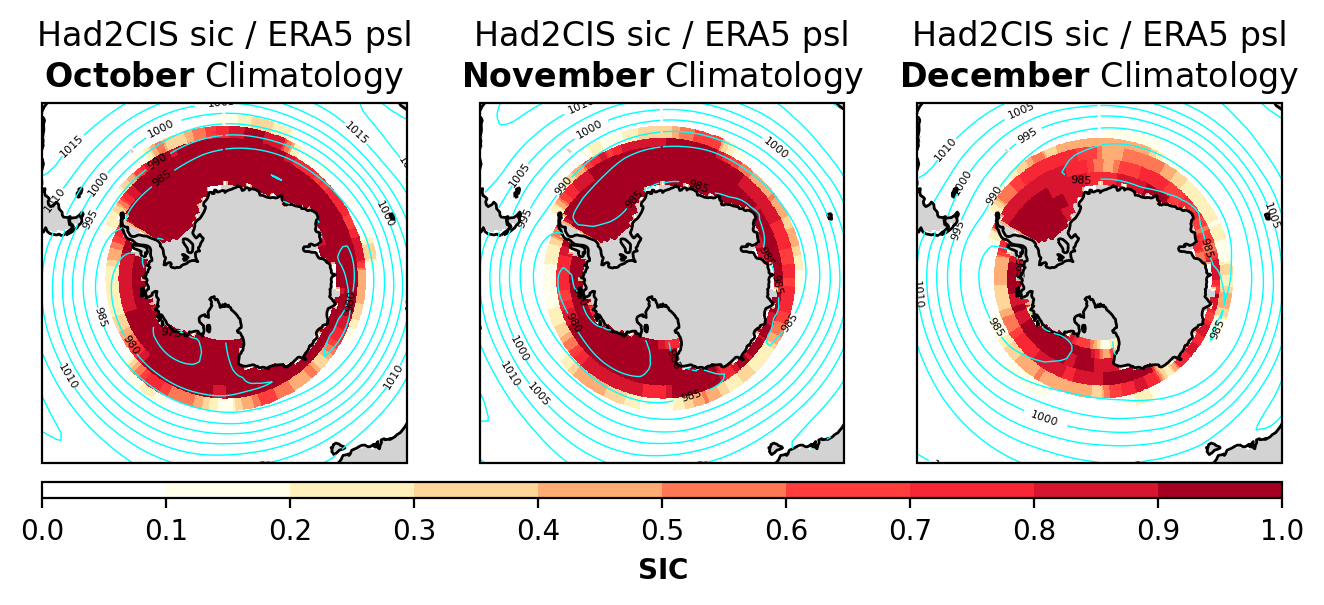

In [9]:
fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(8,6),facecolor='white',dpi=200,subplot_kw={'projection':ccrs.Orthographic(central_latitude=-90., central_longitude=0.0)})

for i in np.arange(3):
    month = i + 10

    sic_plot = add_sic(ax[i], sic_clim_Had2CIS, anom=False, month=month, year=None)
    #iceedge_plot = add_ice_edge(ax[i], sic_clim_Had2CIS, month=month)
    add_psl(ax[i], psl_clim_ERA5, month=month)

    set_extent(ax[i])
    ax[i].coastlines()
    ax[i].set_title(f"Had2CIS sic / ERA5 psl\n{monthdict[month]} Climatology")

sic_plot.set_clim([0., 1.])
cticks = np.linspace(0.,1.,11)
cbar = plt.colorbar(sic_plot,ax=ax,aspect=75,shrink=1,ticks=cticks,location='bottom',pad=0.02,label=r"$\mathbf{SIC}$")

plt.show()

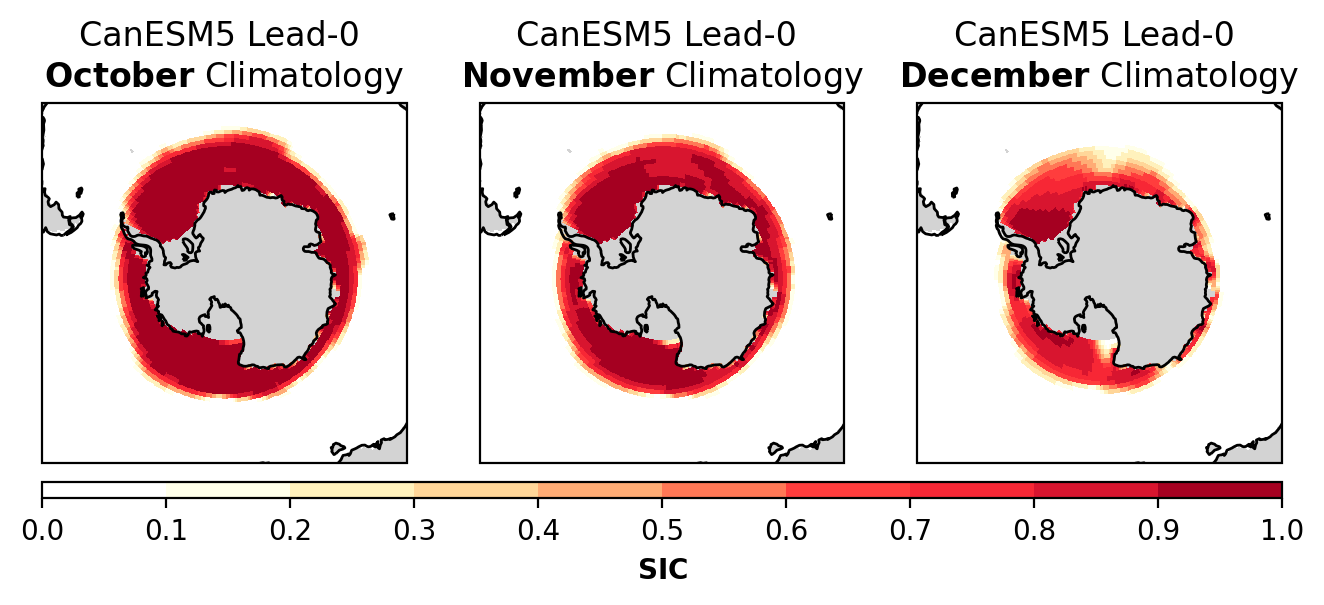

In [10]:
fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(8,6),facecolor='white',dpi=200,subplot_kw={'projection':ccrs.Orthographic(central_latitude=-90., central_longitude=0.0)})

lead = 0
for i in np.arange(3):
    month = i + 10

    sic_data = sic_clim_CanESM5_init[lead].where(sic_clim_CanESM5_init[lead]['month']==month,drop=True)
    sic_plot = add_sic(ax[i], sic_data, anom=False, month=None, year=None)
    #iceedge_plot = add_ice_edge(ax[i], sic_data, month=None)
    #add_psl(ax[i], psl_clim_ERA5, month=month)

    set_extent(ax[i])
    ax[i].coastlines()
    ax[i].set_title(f"CanESM5 Lead-{lead} \n{monthdict[month]} Climatology")

sic_plot.set_clim([0., 1.])
cticks = np.linspace(0.,1.,11)
cbar = plt.colorbar(sic_plot,ax=ax,aspect=75,shrink=1,ticks=cticks,location='bottom',pad=0.02,label=r"$\mathbf{SIC}$")

plt.show()

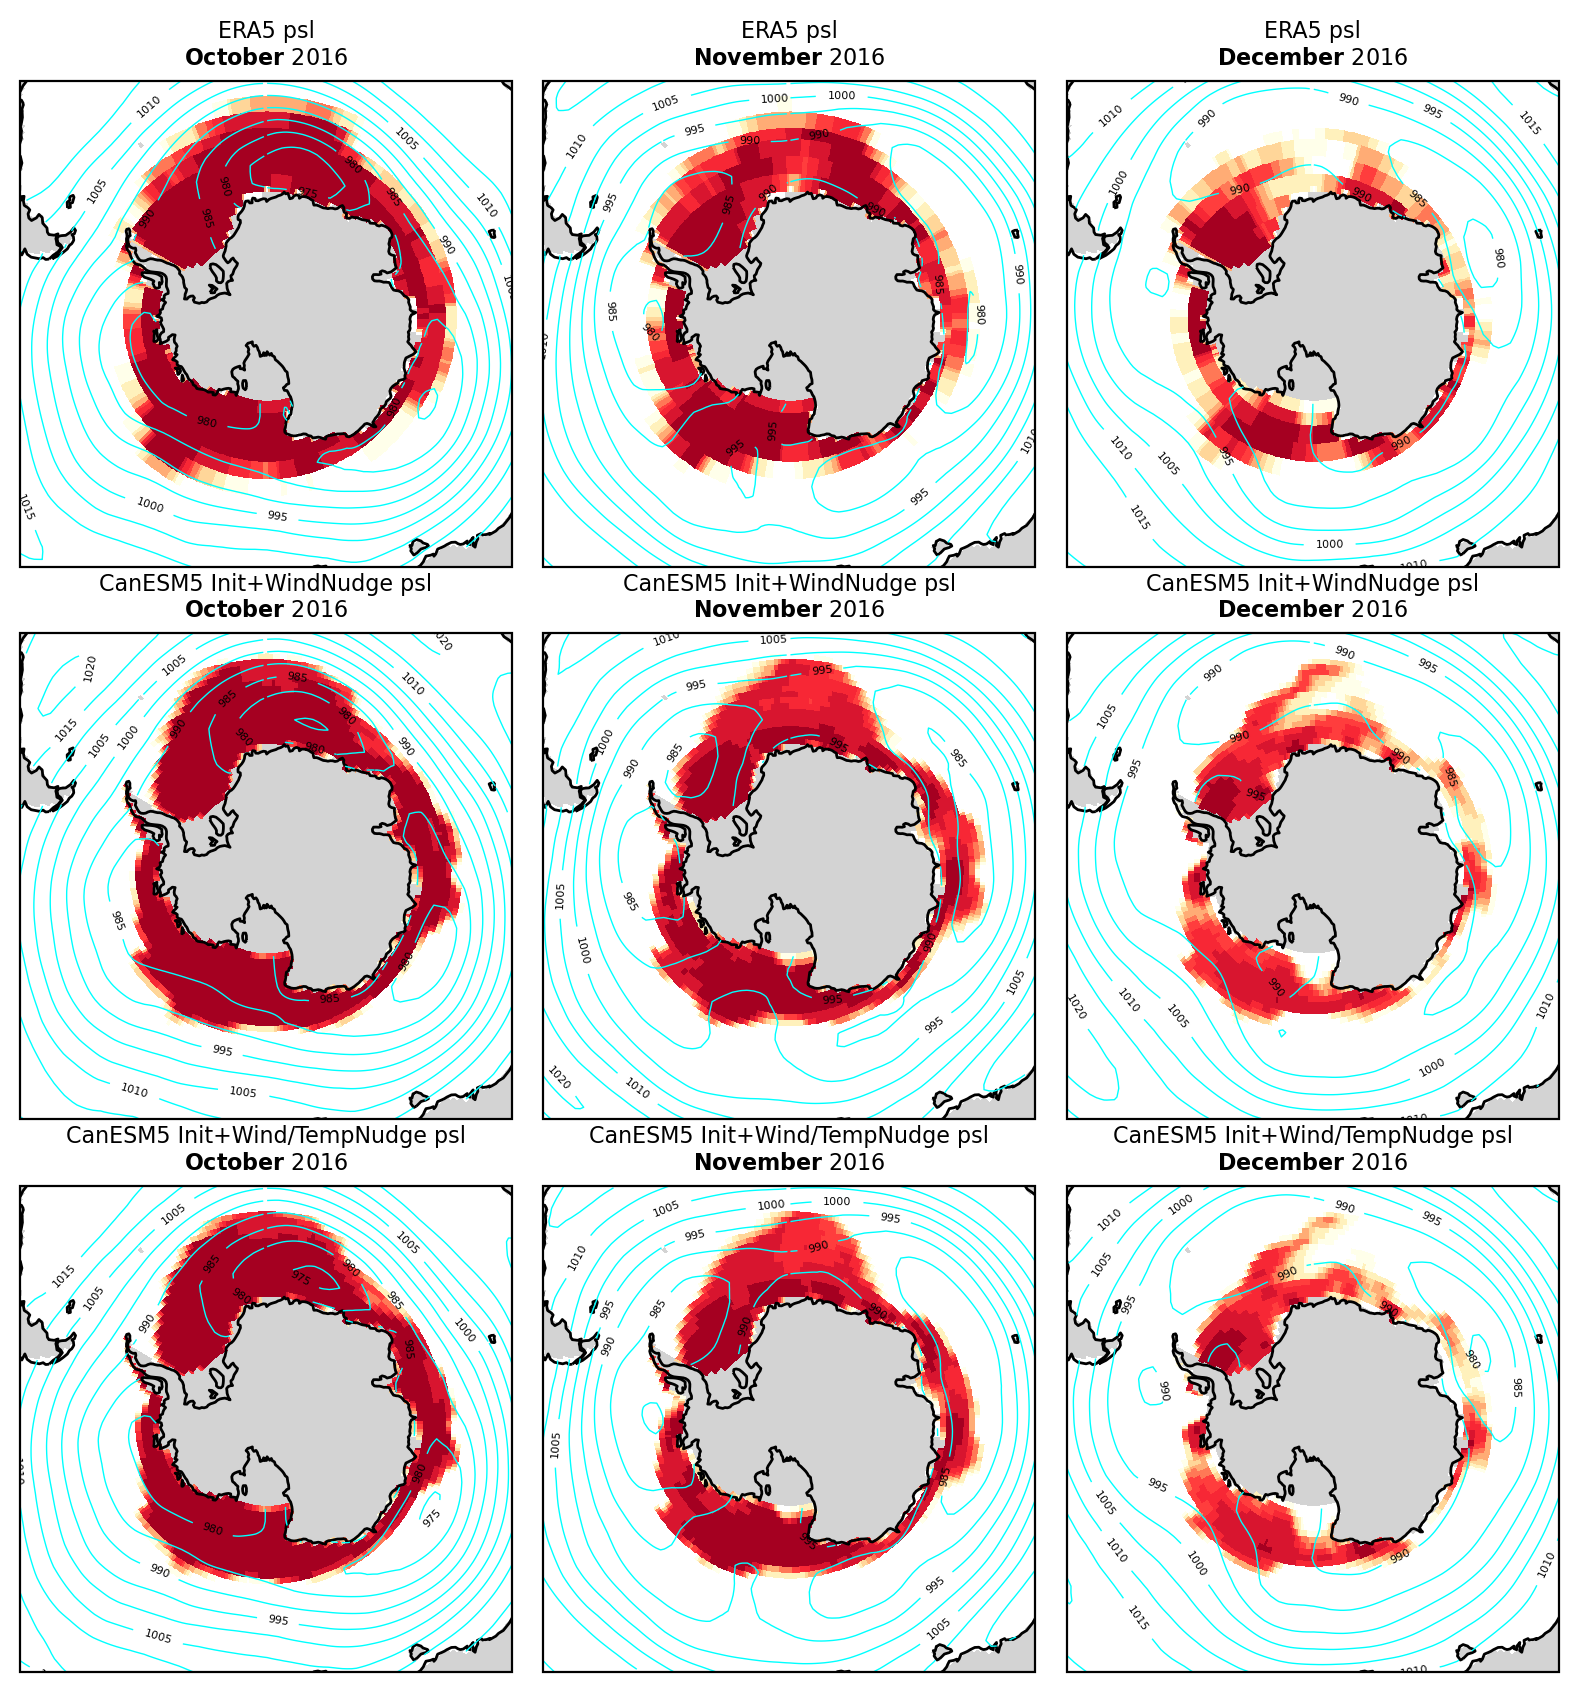

In [11]:
ncols=3
nrows=3
fig, ax = plt.subplots(ncols=ncols,nrows=nrows,figsize=(8,8.5),facecolor='white',dpi=200,subplot_kw={'projection':ccrs.Orthographic(central_latitude=-90., central_longitude=0.0)})

for i in np.arange(ncols): # month
    for j in np.arange(nrows): # ERA5 or simulation
        month = i + 10

        set_extent(ax[j][i])
        ax[j][i].coastlines()

        if j == 0:
            add_psl(ax[j][i], psl_ERA5, month=month, year=2016)
            add_sic(ax[j][i], sic_Had2CIS, anom=False, month=month, year=2016)
            ax[j][i].set_title(f"ERA5 psl\n{monthdict[month]} 2016", size=8)
        elif j == 1:
            add_psl(ax[j][i], psl_CanESM5_wn2016_init, month=month, year=2016)
            add_sic(ax[j][i], sic_CanESM5_wn2016_init, anom=False, month=month, year=2016)
            ax[j][i].set_title(f"CanESM5 Init+WindNudge psl\n{monthdict[month]} 2016", size=8)
        elif j == 2:
            add_psl(ax[j][i], psl_CanESM5_wtn2016_init, month=month, year=2016)
            add_sic(ax[j][i], sic_CanESM5_wtn2016_init, anom=False, month=month, year=2016)
            ax[j][i].set_title(f"CanESM5 Init+Wind/TempNudge psl\n{monthdict[month]} 2016", size=8)

plt.tight_layout()
plt.show()